# Team 3 Group Assignment - Python for Analysts

## Data Collection

### Importing the dataset

Importing a dataset showing the crime level by different Boroughs in London through October 2023 to September 2025. 

#### Goal

Our goal with this analysis is to find out which Borough has the most crimes and at what time of the year these happen. We want to recommend which areas are the best to move into based on crime levels. In addition, which months to be aware of break in. 
Our main business focus is to help real estate agents to sell houses in certain areas. They will be able to use our analysis to provide information to both sellers and buyers in these areas.

In [179]:
# importing the library "pandas" as pd
import pandas as pd

In [180]:
# creating a URL link to the dataset stored on GitHub, loading that dataset into this notebook using pandas, and assigning it to a DataFrame called df
url = "https://raw.githubusercontent.com/raastock/MPS-Borough-Level-Crime-/refs/heads/main/MPS%20Borough%20Level%20Crime%20(most%20recent%2024%20months).csv"
df = pd.read_csv(url)

## Initial Analysis

After importing the dataset we print the head and info. We do this to gain information about the dataset in order to make decisions on how to clean it to be able to analyse it in the best way.

In [181]:
df.head()

,MajorText,MinorText,BoroughName,202310,202311,202312,202401,202402,202403,202404,...,202412,202501,202502,202503,202504,202505,202506,202507,202508,202509
0,ARSON AND CRIMINAL DAMAGE,ARSON,Barking and Dagenham,4,3,4,4,5,6,3,...,9,7,8,4,13,10,10,11,10,5
1,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Barking and Dagenham,82,88,125,126,124,134,112,...,88,104,89,103,123,108,124,137,126,100
2,BURGLARY,BURGLARY - RESIDENTIAL,Barking and Dagenham,0,0,0,0,2,50,52,...,83,71,48,77,40,37,51,35,41,34
3,BURGLARY,BURGLARY BUSINESS AND COMMUNITY,Barking and Dagenham,26,19,20,31,21,30,24,...,21,16,14,23,20,26,25,25,23,23
4,BURGLARY,BURGLARY IN A DWELLING,Barking and Dagenham,63,64,53,67,47,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MajorText    1129 non-null   object
 1   MinorText    1129 non-null   object
 2   BoroughName  1129 non-null   object
 3   202310       1129 non-null   int64 
 4   202311       1129 non-null   int64 
 5   202312       1129 non-null   int64 
 6   202401       1129 non-null   int64 
 7   202402       1129 non-null   int64 
 8   202403       1129 non-null   int64 
 9   202404       1129 non-null   int64 
 10  202405       1129 non-null   int64 
 11  202406       1129 non-null   int64 
 12  202407       1129 non-null   int64 
 13  202408       1129 non-null   int64 
 14  202409       1129 non-null   int64 
 15  202410       1129 non-null   int64 
 16  202411       1129 non-null   int64 
 17  202412       1129 non-null   int64 
 18  202501       1129 non-null   int64 
 19  202502       1129 non-null 

In [183]:
df.describe()

,202310,202311,202312,202401,202402,202403,202404,202405,202406,202407,...,202412,202501,202502,202503,202504,202505,202506,202507,202508,202509
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,...,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,73.058459,70.650133,68.959256,66.928255,66.550044,68.240921,66.811337,70.642161,69.930027,73.130204,...,67.521701,64.542073,61.307352,66.946856,65.880425,69.756422,69.635075,73.322409,68.730735,65.445527
std,146.675464,161.381093,159.927361,135.553440,145.161158,147.746586,135.706749,130.677095,134.927796,134.338021,...,165.832784,131.462202,128.960280,133.144501,123.370445,124.999943,128.916473,134.490510,121.289489,110.539124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000
50%,24.000000,24.000000,23.000000,23.000000,23.000000,24.000000,23.000000,26.000000,27.000000,26.000000,...,22.000000,23.000000,21.000000,24.000000,25.000000,27.000000,27.000000,29.000000,27.000000,29.000000
75%,91.000000,87.000000,85.000000,84.000000,79.000000,84.000000,79.000000,82.000000,86.000000,89.000000,...,82.000000,81.000000,75.000000,83.000000,83.000000,87.000000,85.000000,88.000000,83.000000,78.000000
max,2065.000000,3310.000000,3403.000000,2628.000000,2931.000000,3346.000000,2817.000000,2148.000000,2334.000000,2154.000000,...,4100.000000,2788.000000,2680.000000,2575.000000,2036.000000,1782.000000,1902.000000,1914.000000,1502.000000,1446.000000


In [184]:
# printing the number of unique values in BoroughName to confirm how many different areas there are in the dataset
df['BoroughName'].nunique()

34

In [185]:
# printing the names of each of the unique values to gain further information and confirm which areas are included in the dataset
for borough in df['BoroughName'].unique():
    print(borough)

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
London Heathrow and London City Airports
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Unknown
Waltham Forest
Wandsworth
Westminster


## Data Cleaning


?????? What should we do here

## Data Transformation

### Merging Values

Merging the values so each Borough only has one row. We do this to make it easier to do the visualization. 

In [186]:
# creating a new DataFrame called merged_df, grouping all the same values in the column BoroughName together
merged_df = df.groupby('BoroughName', as_index=False).sum()

In [187]:
# printing all the rows to confirm that all of the same values in BoroughName has successfully merged
merged_df.head(34)

,BoroughName,MajorText,MinorText,202310,202311,202312,202401,202402,202403,202404,...,202412,202501,202502,202503,202504,202505,202506,202507,202508,202509
0,Barking and Dagenham,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,1496,1577,1698,1678,1636,1764,1577,...,1585,1568,1376,1751,1779,1711,1765,1791,1629,1639
1,Barnet,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,2437,2482,2349,2345,2302,2298,2273,...,2214,2305,2129,2433,2277,2426,2353,2554,2315,2333
2,Bexley,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,1337,1414,1430,1420,1303,1482,1419,...,1196,1311,1302,1374,1281,1390,1379,1405,1311,1309
3,Brent,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,2557,2610,2612,2550,2637,2724,2655,...,2544,2576,2411,2683,2523,2866,2859,3190,2943,2732
4,Bromley,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,1871,2050,1931,1911,1944,2003,1974,...,1975,1977,1875,1952,2037,2051,1989,2215,2076,1988
5,Camden,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,3411,3648,3158,3171,3638,3563,3412,...,3711,3272,3491,3462,3376,3407,3322,3674,3439,3402
6,Croydon,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,2790,2909,2827,2921,2731,2969,2716,...,2938,2842,2580,2886,2776,2992,2902,3113,2909,2737
7,Ealing,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,2690,2705,2547,2532,2610,2665,2485,...,2494,2665,2457,2703,2667,2686,2834,3024,2681,2478
8,Enfield,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,2366,2461,2497,2409,2222,2280,2335,...,2412,2538,2254,2461,2293,2429,2453,2579,2248,2380
9,Greenwich,ARSON AND CRIMINAL DAMAGEARSON AND CRIMINAL DA...,ARSONCRIMINAL DAMAGEBURGLARY - RESIDENTIALBURG...,2112,2304,2354,2318,2105,2214,2126,...,2247,2127,2096,2365,2369,2509,2408,2531,2459,2278


### Datatype

Making sure that all column headings are strings in order to be able to perform data visualization.

In [188]:
print(merged_df.columns)
print(type(merged_df.columns[0]))

Index(['BoroughName', 'MajorText', 'MinorText', '202310', '202311', '202312',
       '202401', '202402', '202403', '202404', '202405', '202406', '202407',
       '202408', '202409', '202410', '202411', '202412', '202501', '202502',
       '202503', '202504', '202505', '202506', '202507', '202508', '202509'],
      dtype='object')
<class 'str'>


## Data Exploration and Visualization

Starting to perform DV to be able to see trends to gain useful information.  


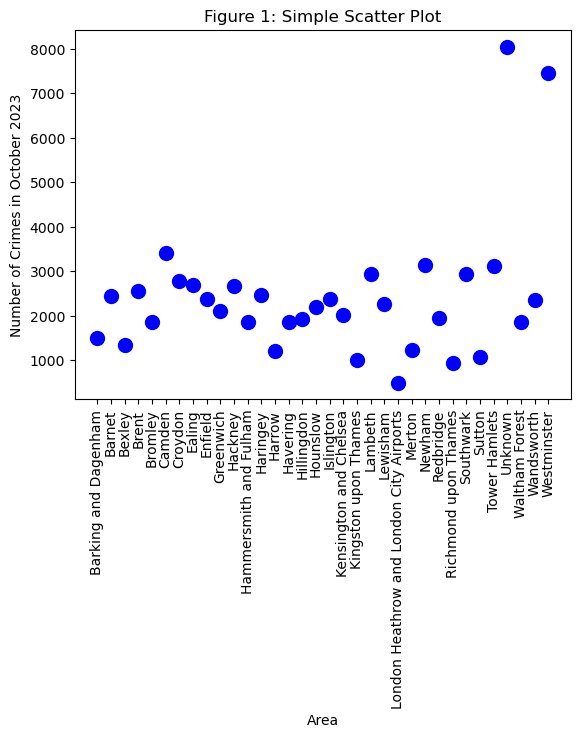

In [189]:
# printing a scatterplot of borough and number of crimes for a specific month

import matplotlib.pyplot as plt

plt.scatter(merged_df["BoroughName"], merged_df["202310"], color='blue', s=100)
plt.title("Figure 1: Simple Scatter Plot")
plt.xticks(rotation=90)
plt.xlabel("Area")
plt.ylabel("Number of Crimes in October 2023")
plt.show()

#### Analysis Figure 1

/////

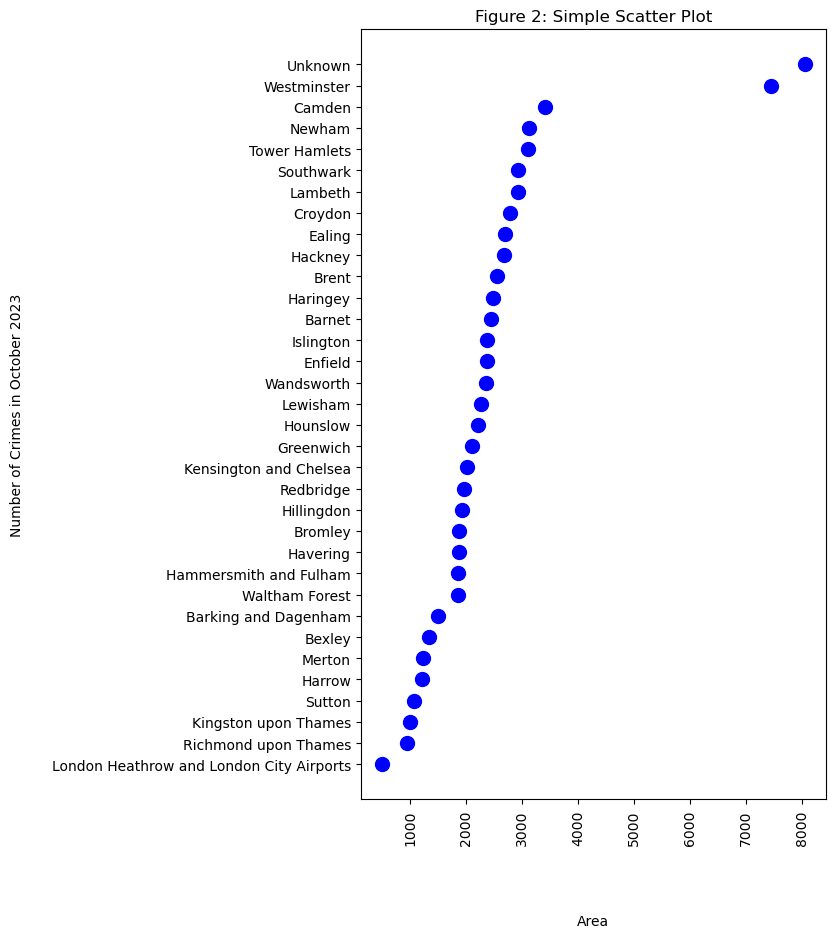

In [190]:
# sorting it by least to most crimes

merged_df_sorted = merged_df.sort_values(by="202310") 

plt.figure(figsize=(6,10))
plt.scatter(merged_df_sorted["202310"], merged_df_sorted["BoroughName"], color='blue', s=100)
plt.title("Figure 2: Simple Scatter Plot")
plt.xticks(rotation=90)
plt.xlabel("Area", labelpad=50)
plt.ylabel("Number of Crimes in October 2023", labelpad=20)
plt.show()

#### Analysis Figure 2

////

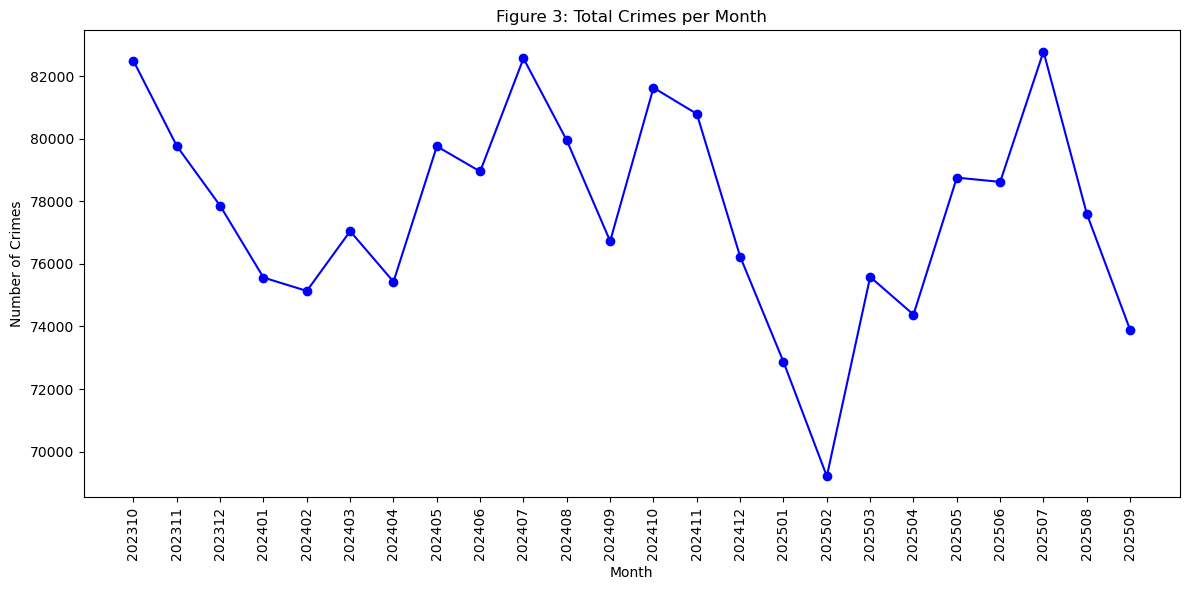

In [191]:
# plotting number of crimes over time

plt.figure(figsize=(12,6))
plt.plot(monthly_totals.index, monthly_totals.values, marker='o', color='blue')
plt.title("Figure 3: Total Crimes per Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Analysis Figure 3

/////

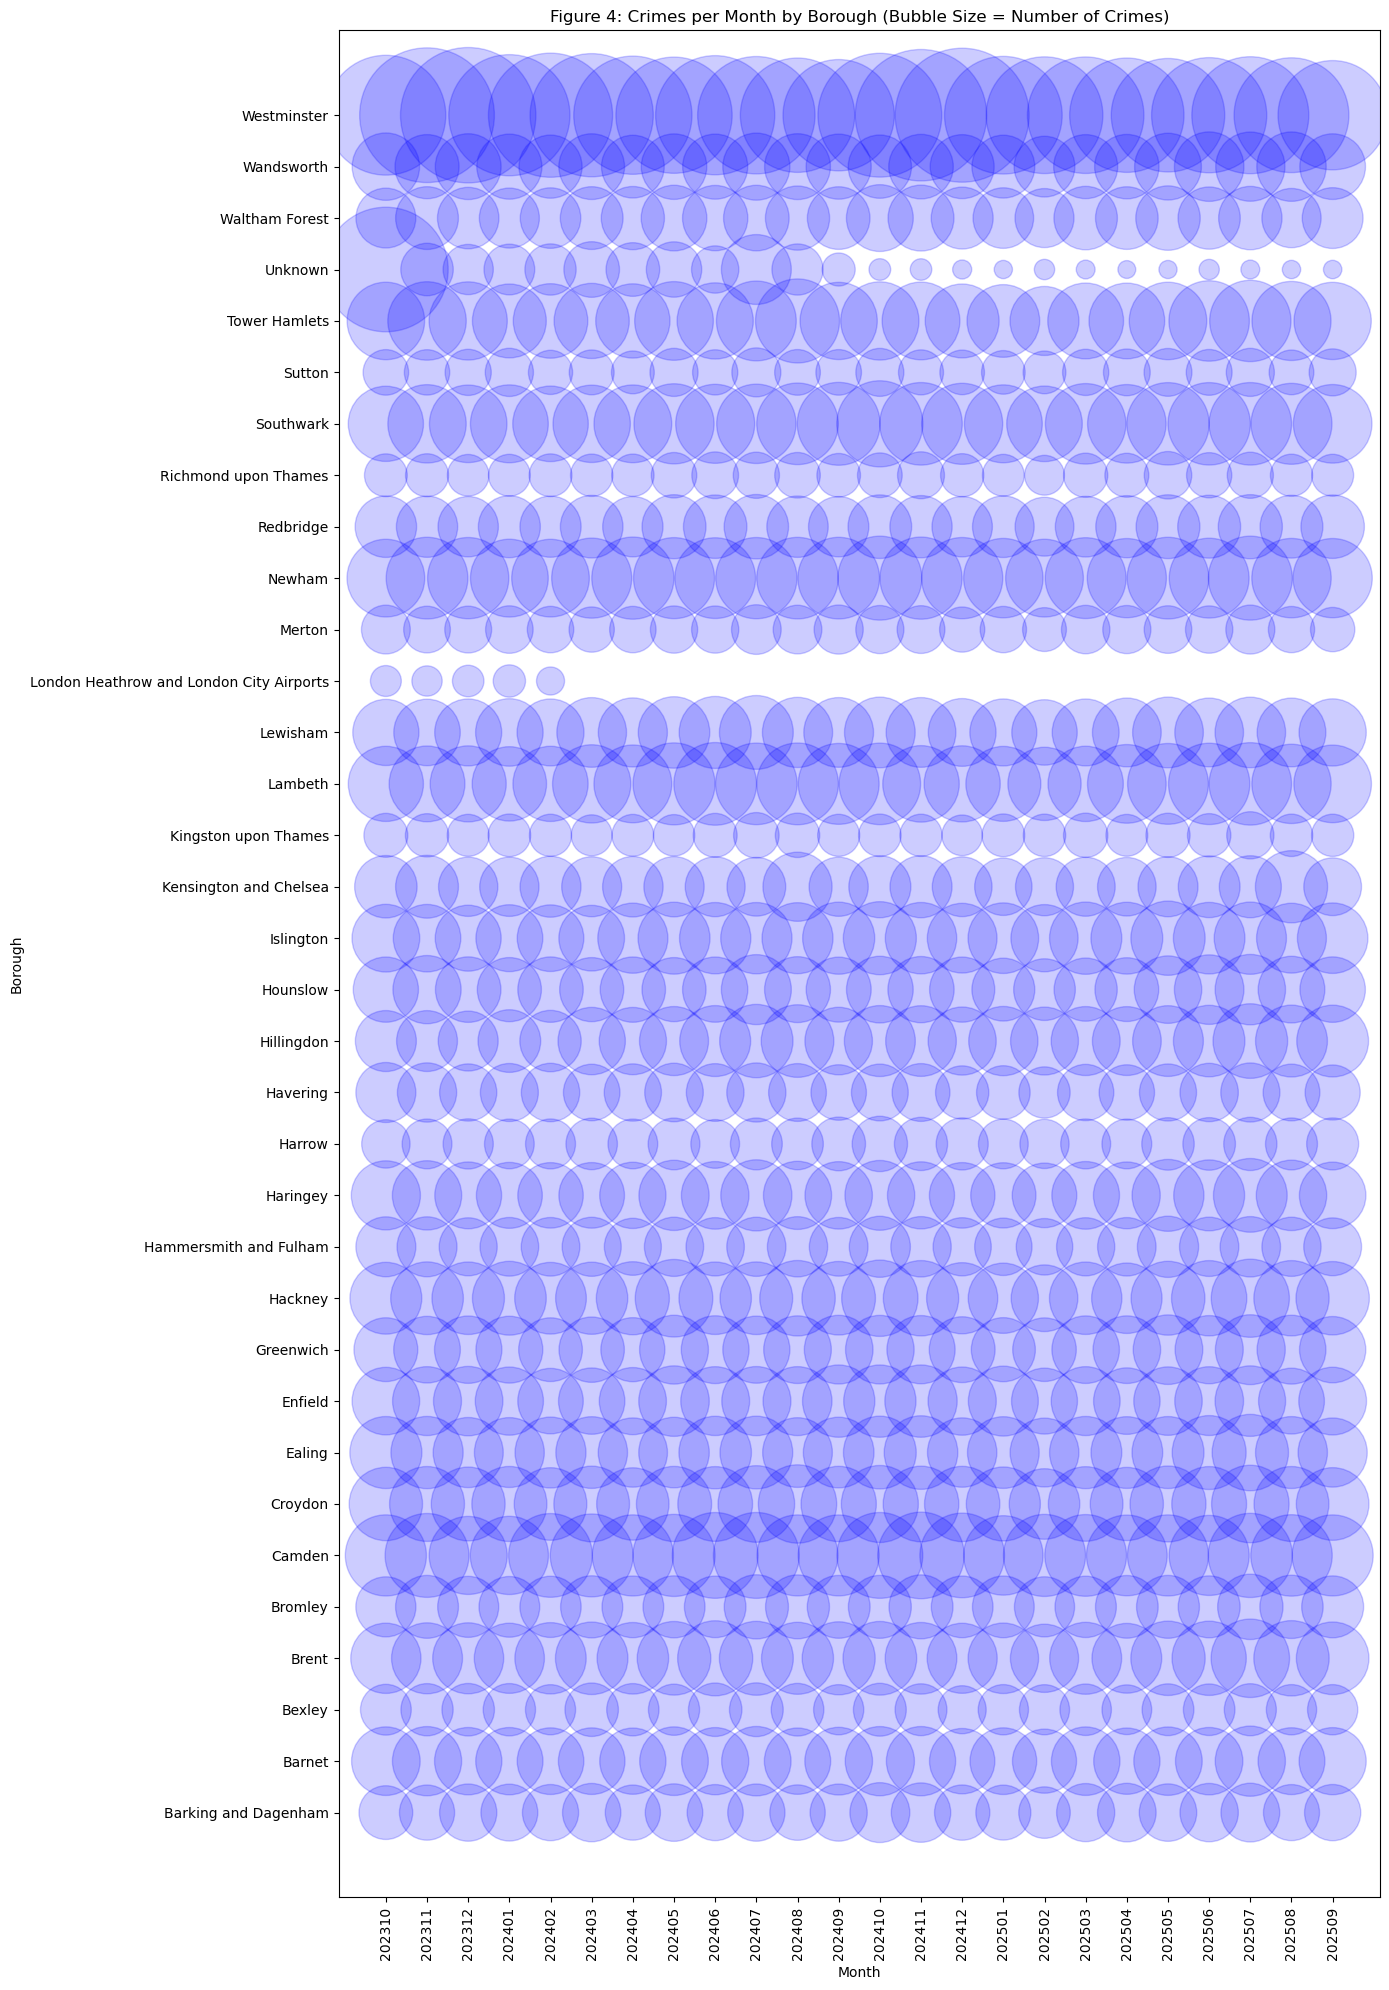

In [192]:
## used chat gpt to generate the following code ##

# Select only numeric columns (months)
month_cols = merged_df.select_dtypes(include='number').columns

# Melt the DataFrame to long format
df_long = merged_df.melt(id_vars='BoroughName', value_vars=month_cols,
                         var_name='Month', value_name='Crimes')

plt.figure(figsize=(14,20))
plt.scatter(df_long['Month'], df_long['BoroughName'],
            s=df_long['Crimes'],  # size of dots
            alpha=0.2,            # make dots semi-transparent
            color='blue')

plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Borough")
plt.title("Figure 4: Crimes per Month by Borough (Bubble Size = Number of Crimes)")
plt.tight_layout()
plt.show()

#### Analysis Figure 4


/////

### Statistical Analysis and Correlation


??? Maybe name it something else

Creating correlation matrix to see if there is a correlation between different months and/or types of crime. We do this do gain further insight into the dataset to be able to provide useful information to the real estate agents. 

In [193]:
# Select month columns (numeric)
month_cols = df.select_dtypes(include='number').columns

# Group by MajorText and sum the monthly values across boroughs
crime_by_type = df.groupby('MajorText')[month_cols].sum()

In [194]:
# Correlation between crime types across months
correlation_matrix = crime_by_type.T.corr()

In [195]:
print(correlation_matrix)

MajorText                             ARSON AND CRIMINAL DAMAGE  BURGLARY  \
MajorText                                                                   
ARSON AND CRIMINAL DAMAGE                              1.000000 -0.044539   
BURGLARY                                              -0.044539  1.000000   
DRUG OFFENCES                                         -0.084119 -0.588586   
FRAUD AND FORGERY                                     -0.020197  0.028348   
MISCELLANEOUS CRIMES AGAINST SOCIETY                   0.174612 -0.497730   
NFIB FRAUD                                            -0.068694  0.145607   
POSSESSION OF WEAPONS                                  0.577490 -0.422778   
PUBLIC ORDER OFFENCES                                  0.852471 -0.210039   
ROBBERY                                                0.413748  0.491591   
SEXUAL OFFENCES                                        0.470479 -0.630029   
THEFT                                                  0.278272  0.341453   

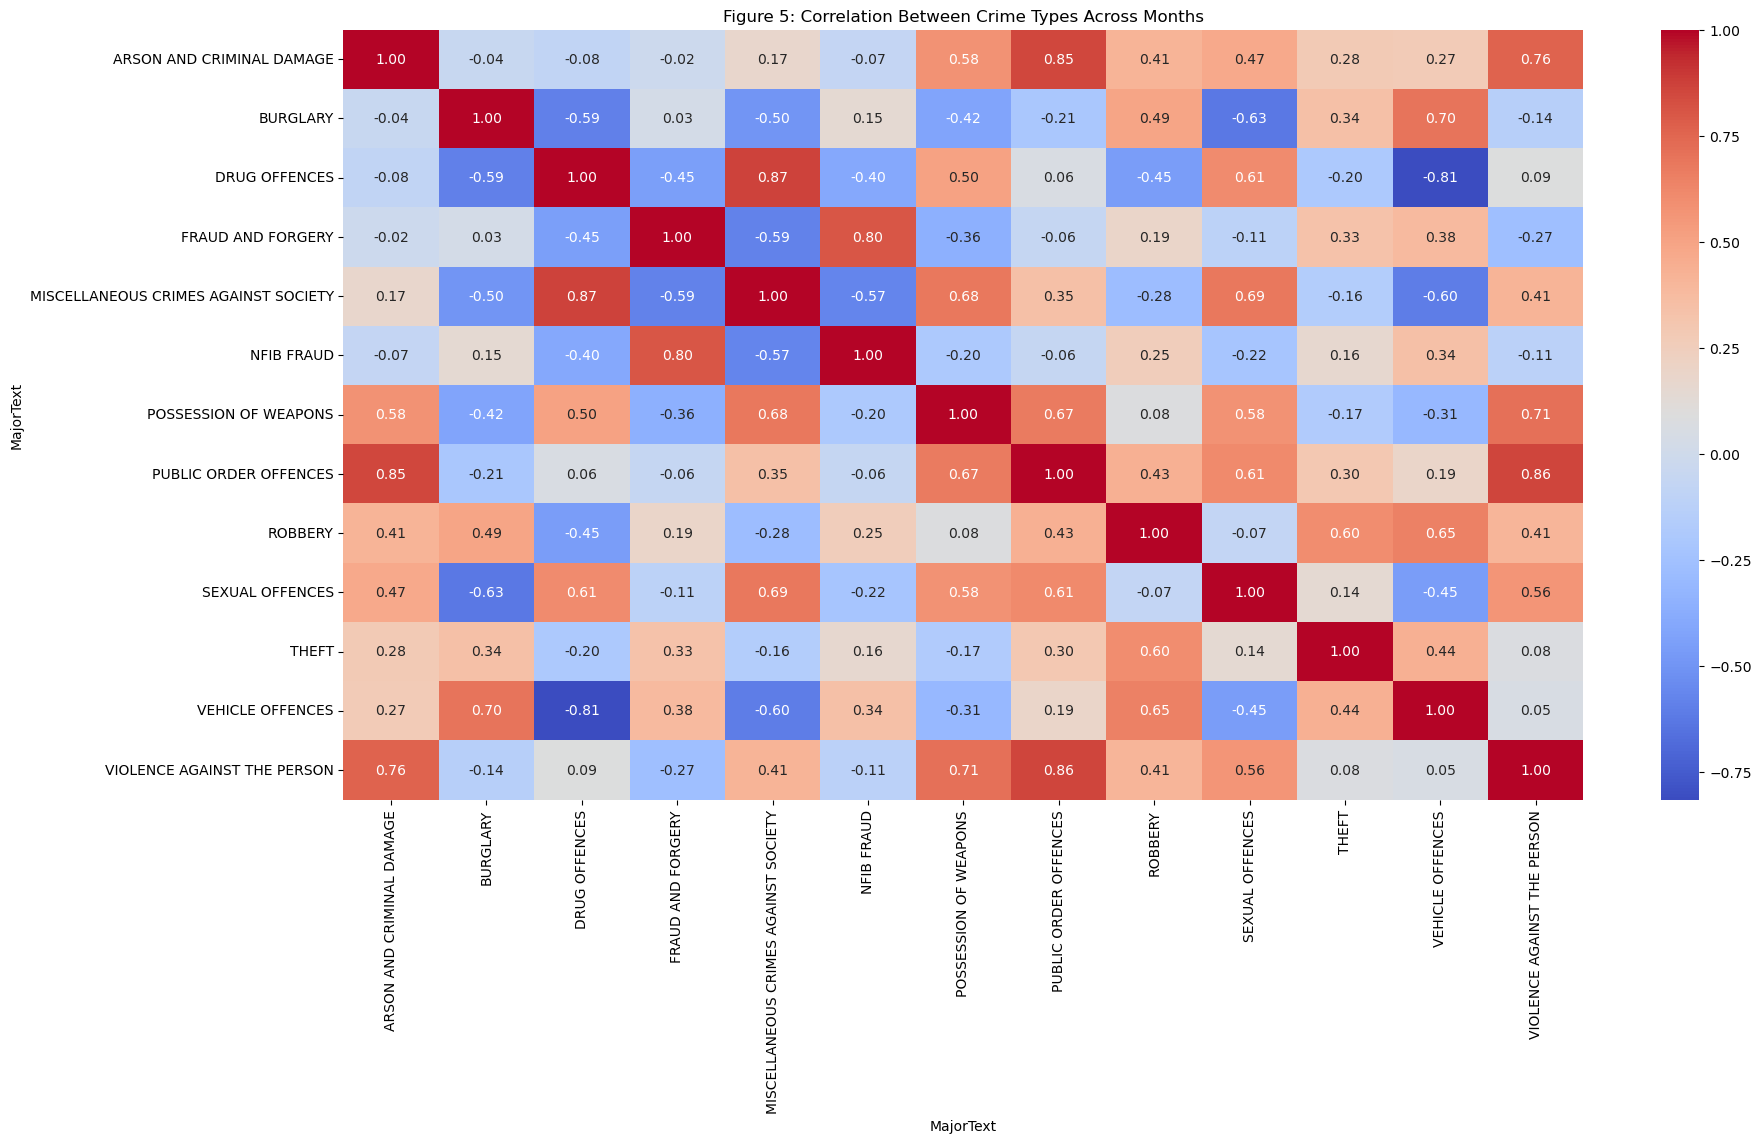

In [196]:
# printing a heatmap of the correlations

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Figure 5: Correlation Between Crime Types Across Months")
plt.show()

#### Analysis Figure 5

We can see that Public Order Offences and Arson and Criminal Damage has a high correlation or 0.85. We can state that these two crimes are correlated. Note that this does not mean that they have a causation relationship. 

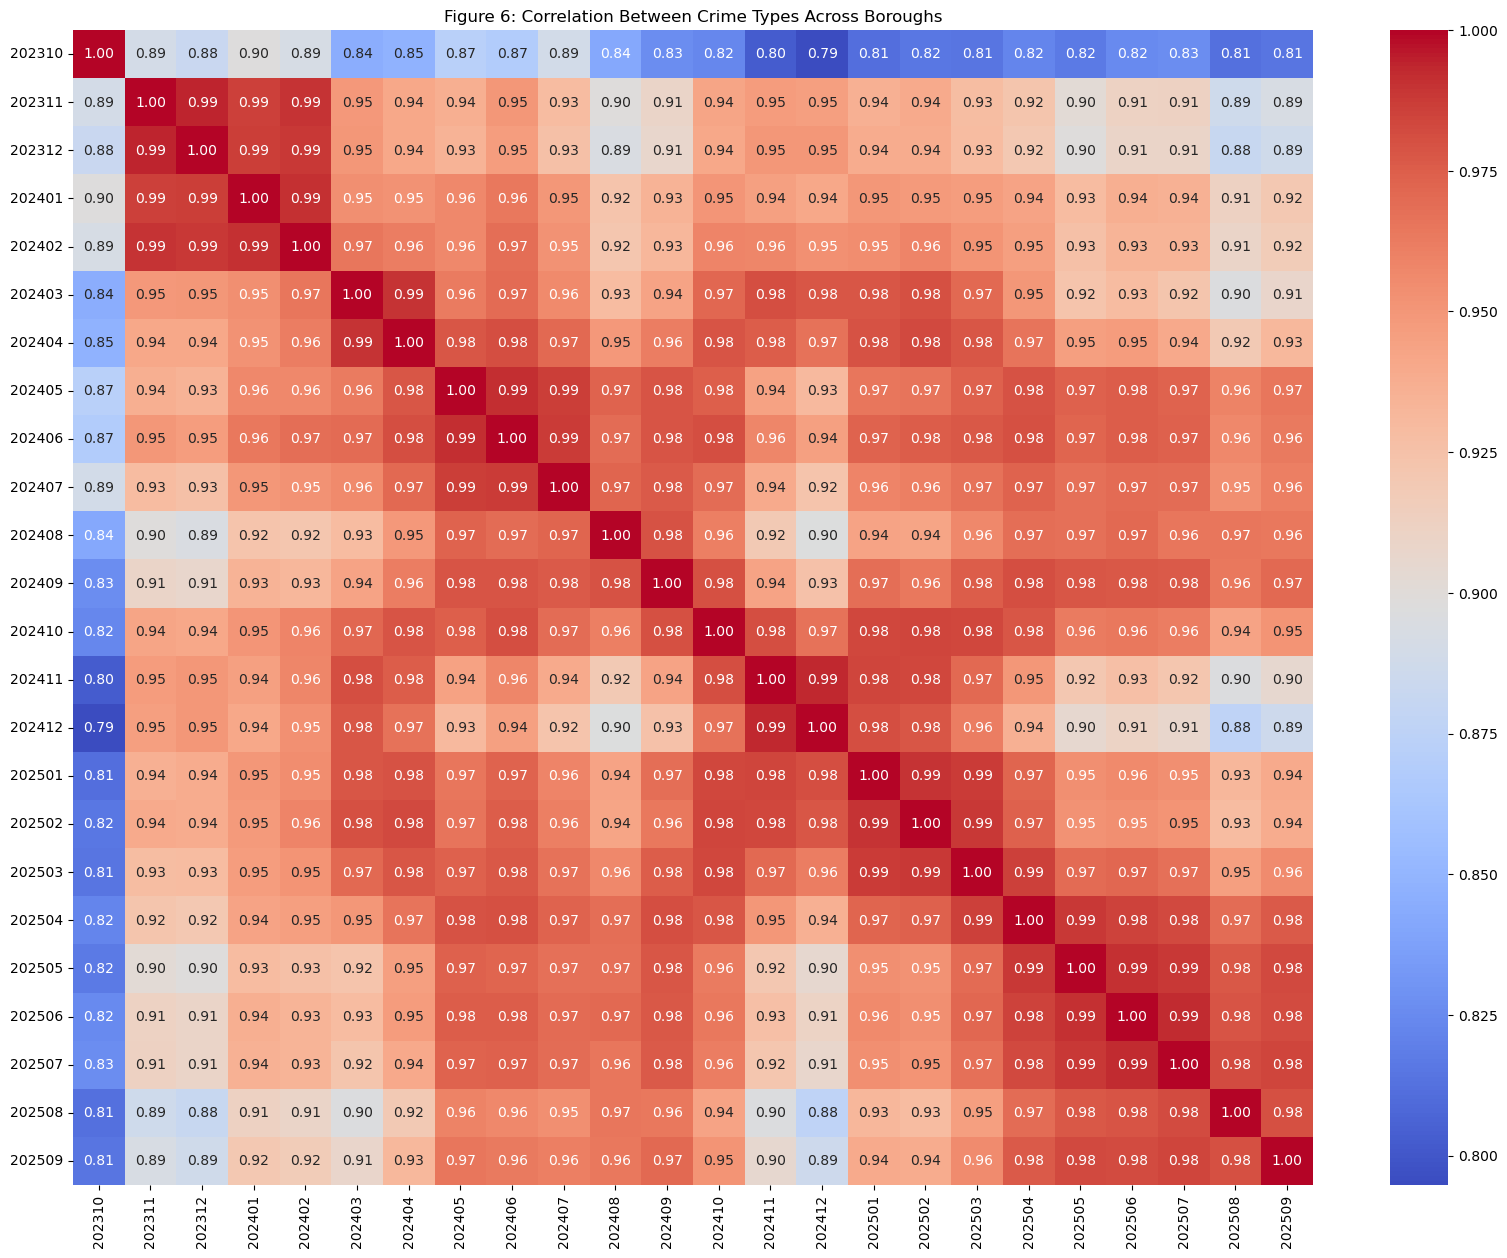

In [197]:
# Select only numeric columns (crime counts)
crime_numeric = df.select_dtypes(include='number')

# Compute correlation matrix
corr = crime_numeric.corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure 6: Correlation Between Crime Types Across Boroughs")
plt.show()

#### Analysis Figure 6

////

In [198]:
## chat gpt generated code stops here ##

### Plots with Functions

Using a function to generate plots

In [199]:
def plot_monthly_crimes(df, borough_name):
    """
    Plots number of crimes per month for a specific borough.
    
    Parameters:
        df: pandas DataFrame containing borough, month columns
        borough_name: str, name of the borough to analyze
    """
    # Select only numeric columns (months)
    month_cols = df.select_dtypes(include='number').columns
    
    # Filter for the borough
    borough_data = df[df['BoroughName'] == borough_name]
    
    if borough_data.empty:
        print(f"No data found for borough: {borough_name}")
        return
    
    # Extract the monthly data (as a Series)
    monthly_values = borough_data[month_cols].iloc[0]
    
    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(monthly_values.index, monthly_values.values, marker='o', color='blue')
    plt.title(f"Monthly Crimes in {borough_name}")
    plt.xlabel("Month")
    plt.ylabel("Number of Crimes")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

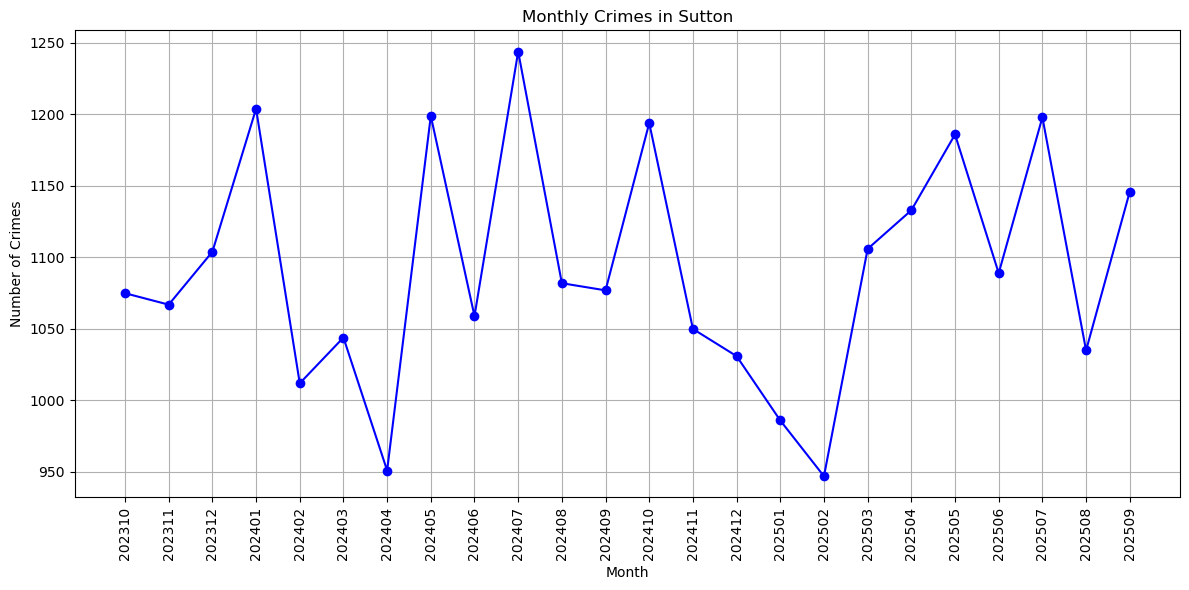

In [200]:
plot_monthly_crimes(merged_df, "Sutton")

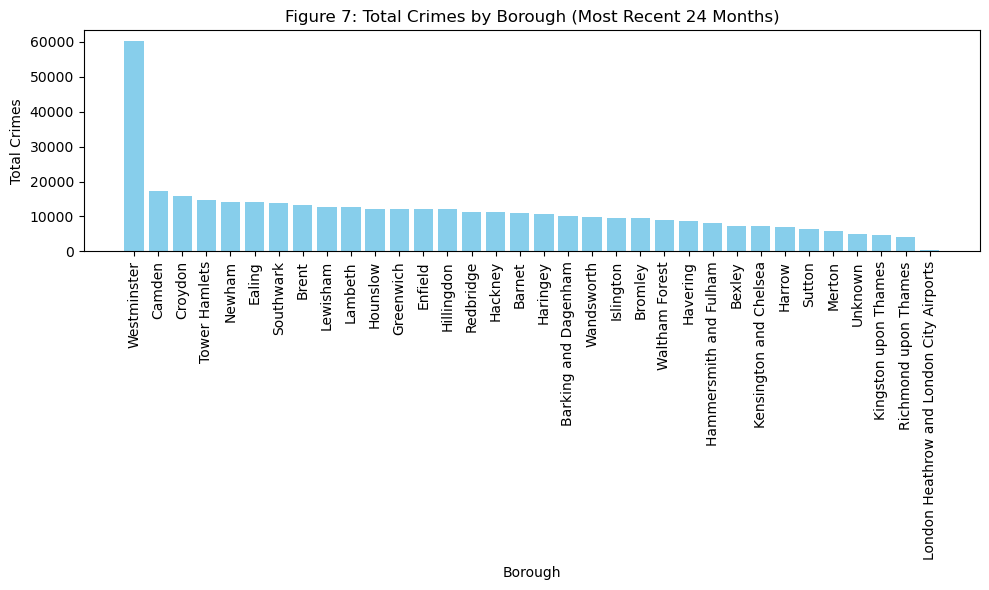

In [201]:
# creating a bar diagram of total crimes and area

numeric_cols = df.select_dtypes(include="number")
df["Total Crimes"] = numeric_cols.sum(axis=1)

df_sorted = df.sort_values(by="Total Crimes", ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_sorted["BoroughName"], df_sorted["Total Crimes"], color="skyblue")
plt.xticks(rotation=90)
plt.title("Figure 7: Total Crimes by Borough (Most Recent 24 Months)")
plt.xlabel("Borough")
plt.ylabel("Total Crimes")
plt.tight_layout()
plt.show()

#### Analysis Figure 7

////

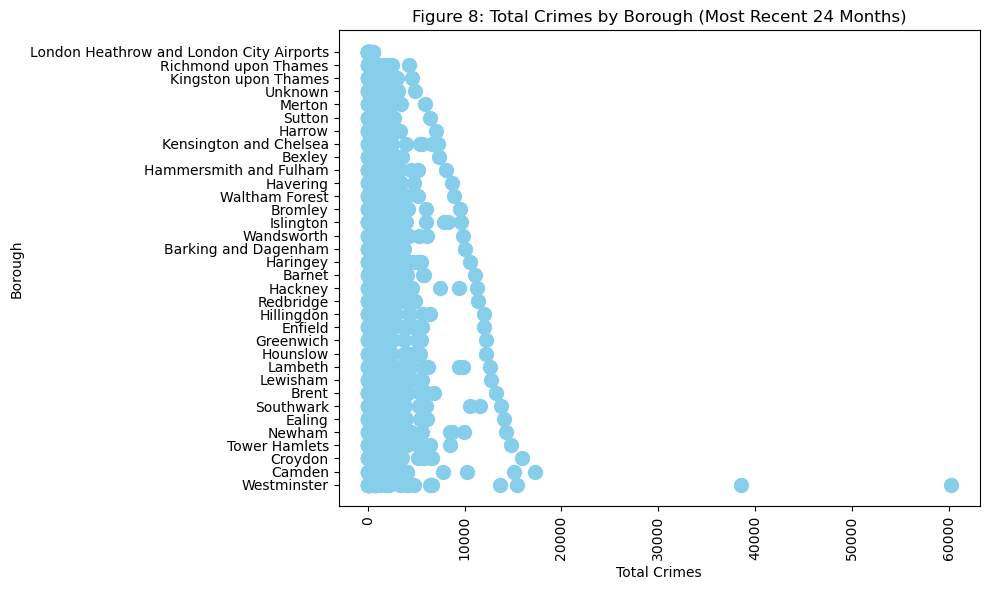

In [202]:
# Using a scatterplot instead

plt.figure(figsize=(10,6))
plt.scatter(df_sorted["Total Crimes"], df_sorted["BoroughName"], color="skyblue", s=100)  # s=100 controls marker size
plt.xticks(rotation=90)
plt.title("Figure 8: Total Crimes by Borough (Most Recent 24 Months)")
plt.ylabel("Borough")
plt.xlabel("Total Crimes")
plt.tight_layout()
plt.show()

#### Analysis Figure 8

/////

array([[<Axes: title={'center': '202310'}>,
        <Axes: title={'center': '202311'}>,
        <Axes: title={'center': '202312'}>,
        <Axes: title={'center': '202401'}>,
        <Axes: title={'center': '202402'}>],
       [<Axes: title={'center': '202403'}>,
        <Axes: title={'center': '202404'}>,
        <Axes: title={'center': '202405'}>,
        <Axes: title={'center': '202406'}>,
        <Axes: title={'center': '202407'}>],
       [<Axes: title={'center': '202408'}>,
        <Axes: title={'center': '202409'}>,
        <Axes: title={'center': '202410'}>,
        <Axes: title={'center': '202411'}>,
        <Axes: title={'center': '202412'}>],
       [<Axes: title={'center': '202501'}>,
        <Axes: title={'center': '202502'}>,
        <Axes: title={'center': '202503'}>,
        <Axes: title={'center': '202504'}>,
        <Axes: title={'center': '202505'}>],
       [<Axes: title={'center': '202506'}>,
        <Axes: title={'center': '202507'}>,
        <Axes: title={'cente

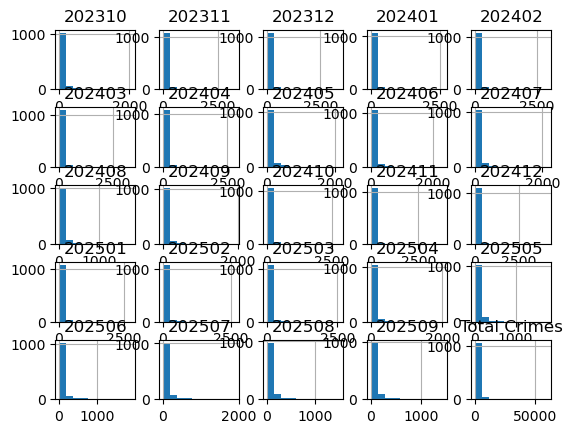

In [203]:
# Creating a histogram of the toal crimes per month


df_sorted.hist()

## Final Analysis

There are more crimes in bla bla bla